## Tournesol
### Optimisation du placement des graines d'un tournesol
2018-03-21 PV
Reprise d'un vieux problème traité dans les années 80 sur Atari 520ST en Basic GFA...
Calcul de l'angle optimal de croissance de graines de tournesol
Un modèle simplifié de tournesol, chaque nouvelle graine est positionnée à un angle tourné de da et un rayon
augmenté de dr par rapport à la graine précédente.
On définit une fonction f = somme des distances des 10 graines les plus proches
On cherche l'angle qui maximise la fonction f, qui donne le plus d'espace à la graine pour se développer
D'après une lecture passée, cet angle est lié au nombre d'or

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import itertools
%matplotlib inline
%config InlineBackend.figure_format='svg'

14.65542403130858


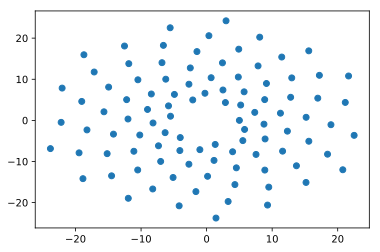

In [2]:
# First a manual example

def dist(g1, g2):
    return (g2[0]-g1[0])**2+(g2[1]-g1[1])**2

#print(dist((0,3),(4,0)))

ng = 100       # Nombre de graines
da = 56.526    # Variation d'angle en degrés
dr = 0.2       # Variation de rayon
r0 = 5         # Rayon initial

angles = np.arange(ng)*da*np.pi/180
rayons = np.arange(ng)*dr+r0
x,y = np.cos(angles)*rayons, np.sin(angles)*rayons
plt.plot(x,y,'o')

graines = list(zip(x,y))
dists = [min(dist(graines[i], graines[j]) for j in range(ng) if j!=i) for i in range(ng)]
d = sum(dists)/ng
print(d)

In [3]:
# Put code in a function

ng = 50       # Nombre de graines
#da = 50        # Variation d'angle en degrés
dr = 0.5       # Variation de rayon
r0 = 5         # Rayon initial

def f(da, plot=False):
    angles = np.arange(ng)*da*np.pi/180
    rayons = np.arange(ng)*dr+r0
    x,y = np.cos(angles)*rayons, np.sin(angles)*rayons
    if plot: 
        plt.plot(x,y,'o')
    graines = list(zip(x,y))
    dists = [min(((graines[i][0]-graines[j][0])**2+(graines[i][1]-graines[j][1])**2) for j in range(ng) if j!=i) for i in range(ng)]
    return sum(dists)/ng

print(f(50))
print(f(45))
print(f(56.526))

21.232264109062115
16.0
45.125807745719385


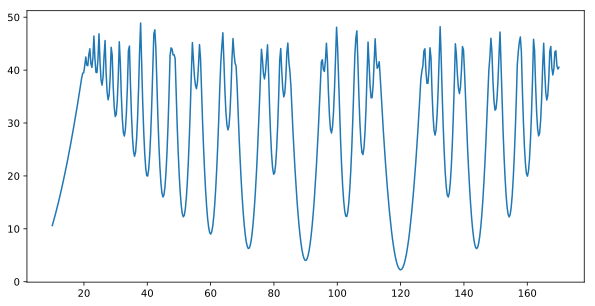

In [4]:
# A first rough analysis
lda = np.linspace(10, 170, 500)
dist = [f(a) for a in lda]
plt.figure(figsize=(10, 5))
_ = plt.plot(lda, dist)

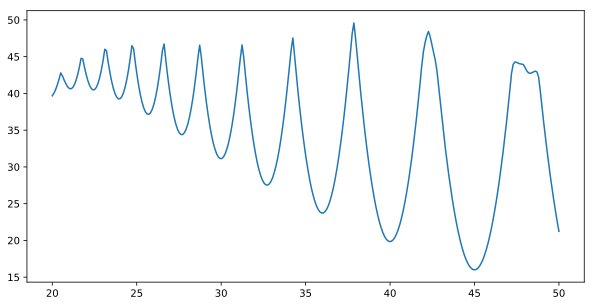

In [5]:
# Zoom in
lda = np.linspace(20, 50, 300)
dist = [f(a) for a in lda]
plt.figure(figsize=(10, 5))
_ = plt.plot(lda, dist)

      fun: -49.58622541597924
 hess_inv: array([[0.00106413]])
      jac: array([-0.01923418])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 277
      nit: 2
     njev: 90
   status: 2
  success: False
        x: array([37.85454393])


49.58622541597924

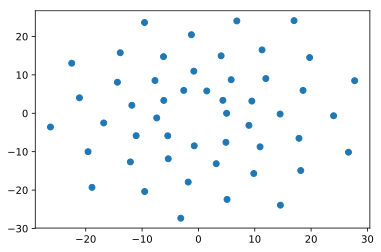

In [6]:
from scipy import optimize
max_a = optimize.minimize(lambda x: -f(x), 37)
print(max_a)
f(max_a.x, True)

48.35919433299494

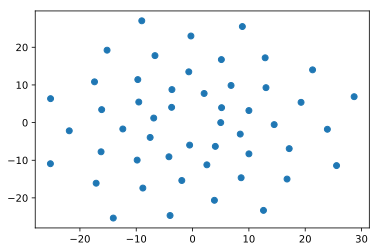

In [7]:
f(132.52012385, True)

44.3400680885417

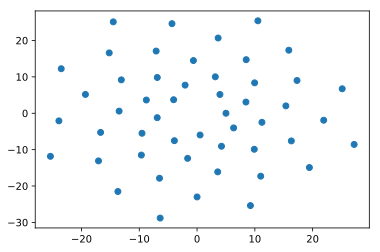

In [8]:
f(137.5, True)

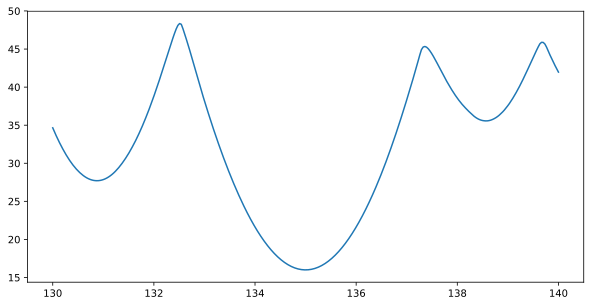

In [9]:
# Zoom in
lda = np.linspace(130, 140, 300)
dist = [f(a) for a in lda]
plt.figure(figsize=(10, 5))
_ = plt.plot(lda, dist)

60.312198309914194

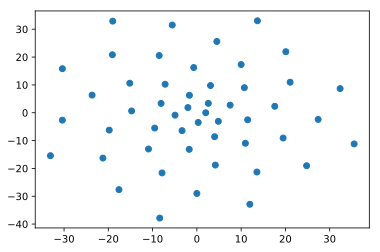

In [45]:
# Variant, we only care about distances less than dinf

def f2(da=137.5, ng=50, r0=2, dr=0.75, dinf=10, plot=False):
    angles = np.arange(ng)*da*np.pi/180
    rayons = np.arange(ng)*dr+r0
    x,y = np.cos(angles)*rayons, np.sin(angles)*rayons
    if plot: 
        plt.plot(x,y,'o')
    graines = list(zip(x,y))
    dists = []
    dinf = dinf**2
    for j in range(ng):
        for i in range(ng):
            if j!=i:
                d = (graines[i][0]-graines[j][0])**2+(graines[i][1]-graines[j][1])**2
                if d<dinf:
                    dists.append(d)
    return np.mean(dists) if len(dists)>0 else 0

f2(da=137.5, plot=True)

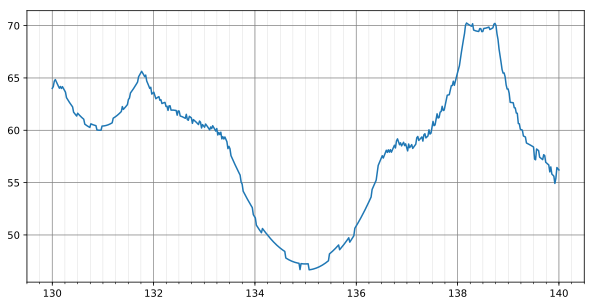

In [46]:
lda2 = np.linspace(130, 140, 500)
dist2 = [f2(a) for a in lda2]
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='grey')
ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='grey')
_ = plt.plot(lda2, dist2)